In [1]:
%matplotlib inline
from matplotlib.pyplot import imshow

import tensorflow as tf
import numpy as np
from PIL import Image

from openslidertfpy import MicroImageReader, is_mock

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
with tf.Graph().as_default():
    coordinator = tf.train.Coordinator()
    runner = MicroImageReader(
        "/home/yota/DataForML/svs/aiba.svs", 
        coordinator, image_width=64, image_height=64, verbose=False
    )
    images, locs, levs = runner.get_inputs()

    results = list()

    with tf.Session() as sess:
        tf.train.start_queue_runners(sess)
        runner.start_thread(sess, [((10000, 10000), 2)])

        while not coordinator.should_stop():
            imgs, ls, vs = sess.run([images, locs, levs])
            results.extend([
                i for i, lo, lv in zip(imgs, ls, vs)
                if not is_mock(lo, lv)
            ])

In [3]:
loaded_image_array = results[0]
loaded_image = Image.fromarray(loaded_image_array.astype(np.uint8))

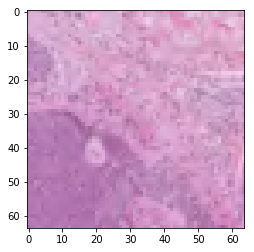

In [4]:
imshow(loaded_image)